In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets.imdb as imdb
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZX992S/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZX992S/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZX992S/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train, test = imdb['train'], imdb['test']

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

for s,l in train:
  x_train.append(s.numpy().decode('utf8'))
  y_train.append(l.numpy())

for s,l in test:
  x_test.append(s.numpy().decode('utf8'))
  y_test.append(l.numpy())

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
tokenizer = Tokenizer(num_words = 10000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
sequences_x_train = tokenizer.texts_to_sequences(x_train)
padded_x_train = pad_sequences(sequences_x_train, maxlen=300, truncating='post')
sequences_x_test = tokenizer.texts_to_sequences(x_test)
padded_x_test = pad_sequences(sequences_x_test, maxlen=300, truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=300),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history= model.fit(padded_x_train, y_train, epochs=5, validation_data=(padded_x_test, y_test))

Epoch 1/5
782/782 [==============================] - 230s 288ms/step - loss: 0.4572 - accuracy: 0.7741 - val_loss: 0.3344 - val_accuracy: 0.8591
Epoch 2/5
782/782 [==============================] - 227s 290ms/step - loss: 0.2567 - accuracy: 0.9032 - val_loss: 0.3201 - val_accuracy: 0.8662
Epoch 3/5
782/782 [==============================] - 226s 289ms/step - loss: 0.1958 - accuracy: 0.9282 - val_loss: 0.4209 - val_accuracy: 0.8584
Epoch 4/5
782/782 [==============================] - 226s 289ms/step - loss: 0.1545 - accuracy: 0.9437 - val_loss: 0.3753 - val_accuracy: 0.8570
Epoch 5/5
782/782 [==============================] - 227s 291ms/step - loss: 0.1108 - accuracy: 0.9616 - val_loss: 0.4436 - val_accuracy: 0.8551


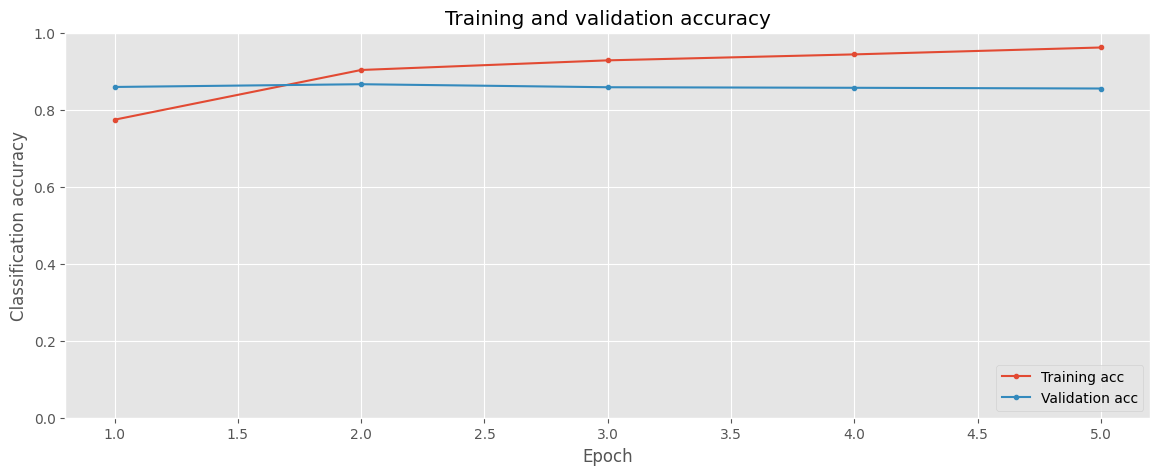

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);